### OLS Task01
#### 쇼핑 고객 데이터

- Customer ID: 고객 아이디
- Gender: 고객의 성별
- Age: 고객의 나이
- Annual Income: 고객의 연소득
- Spending Score: 고객 행동 및 지출 성격에 따라 상점에서 할당한 점수
- Profession: 직업, 전문직
- Work Experience: 고객의 근무 경력(연 단위)
- Family Size: 가족 구성원 수

- profession - feature engineering 필요
- value+ target
- target data는 연소득과 점수를 둘다 할당할 수 있음
- 

In [1]:
import pandas as pd

c_df = pd.read_csv('./datasets/customers.csv')
c_df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [2]:
c_df.Profession.value_counts()

Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: count, dtype: int64

In [3]:
c_df.Gender.value_counts()

Gender
Female    1186
Male       814
Name: count, dtype: int64

In [4]:
pre_c_df = c_df.drop(labels=['Profession','Gender'], axis=1)
pre_c_df

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,1,19,15000,39,1,4
1,2,21,35000,81,3,3
2,3,20,86000,6,1,1
3,4,23,59000,77,0,2
4,5,31,38000,40,2,6
...,...,...,...,...,...,...
1995,1996,71,184387,40,8,7
1996,1997,91,73158,32,7,7
1997,1998,87,90961,14,9,2
1998,1999,77,182109,4,7,2


In [5]:
pre_c_df.corr()['Spending Score (1-100)'].sort_values(ascending=False)[1:]

Annual Income ($)    0.023299
CustomerID           0.018936
Family Size          0.002232
Work Experience     -0.028948
Age                 -0.041798
Name: Spending Score (1-100), dtype: float64

In [6]:
pre_c_df['Spending Score'] = pre_c_df['Spending Score (1-100)']
pre_c_df = pre_c_df.drop(labels=['Spending Score (1-100)'], axis=1)

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income ($)'}>,
        <Axes: title={'center': 'Work Experience'}>],
       [<Axes: title={'center': 'Family Size'}>,
        <Axes: title={'center': 'Spending Score'}>]], dtype=object)

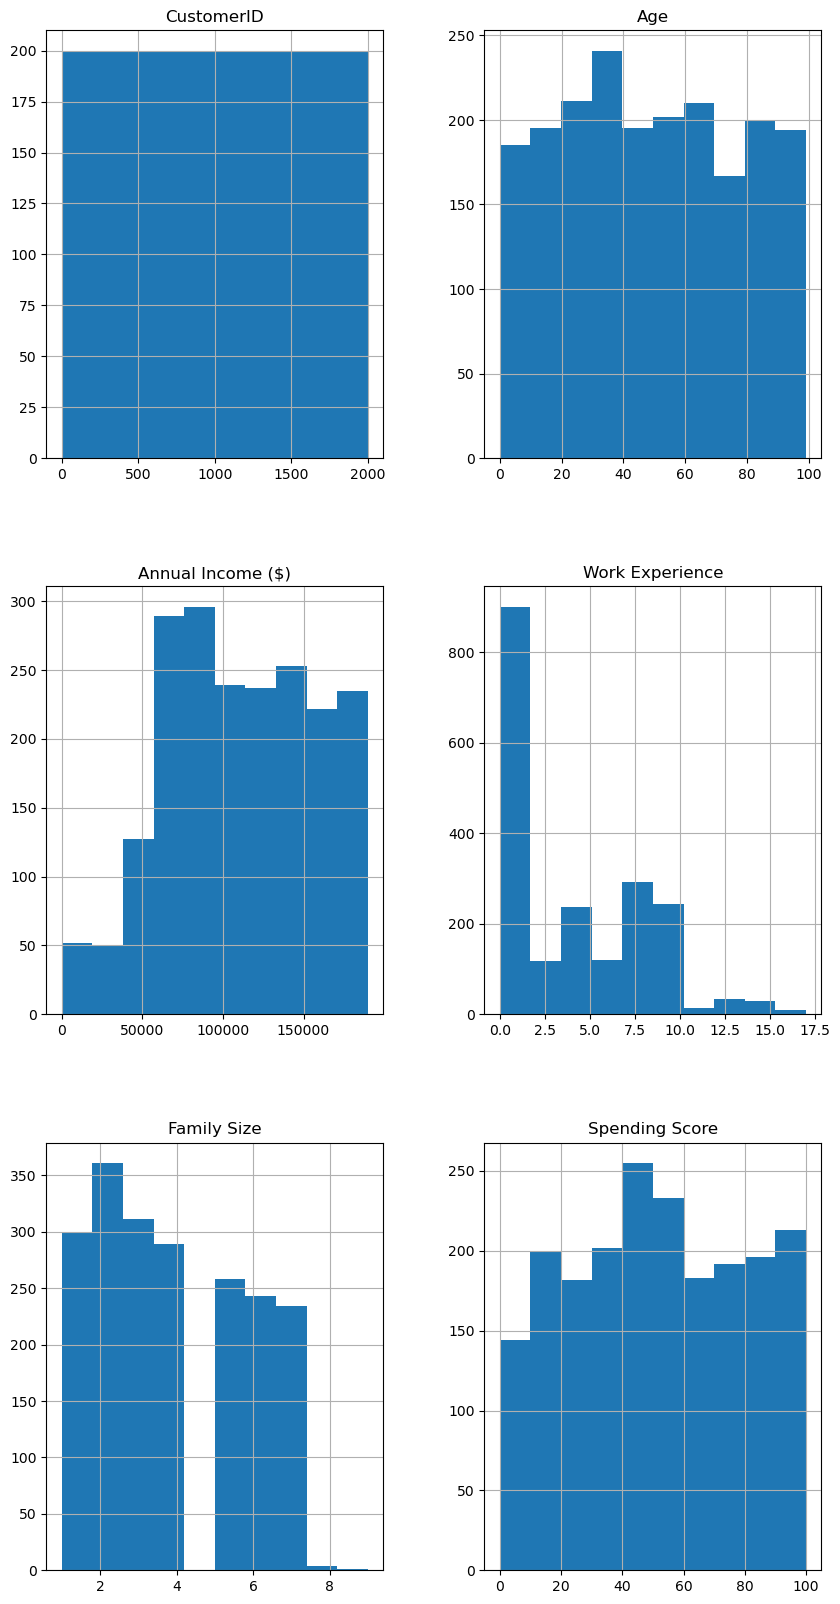

In [7]:
pre_c_df.hist(figsize=(10,20))

In [8]:
from statsmodels.api import OLS

features, targets = pre_c_df.iloc[:,:-1], pre_c_df.iloc[:,-1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:         Spending Score   R-squared (uncentered):                   0.711
Model:                            OLS   Adj. R-squared (uncentered):              0.710
Method:                 Least Squares   F-statistic:                              980.8
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        17:24:57   Log-Likelihood:                         -9721.9
No. Observations:                2000   AIC:                                  1.945e+04
Df Residuals:                    1995   BIC:                                  1.948e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [10]:
get_vif(features)

,vif_score,feature
0,4.484296,CustomerID
1,3.248457,Age
2,5.786161,Annual Income ($)
3,2.017770,Work Experience
4,3.953610,Family Size


In [11]:
pre_c_df.corr()['Spending Score'].sort_values(ascending=False)[1:]

Annual Income ($)    0.023299
CustomerID           0.018936
Family Size          0.002232
Work Experience     -0.028948
Age                 -0.041798
Name: Spending Score, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

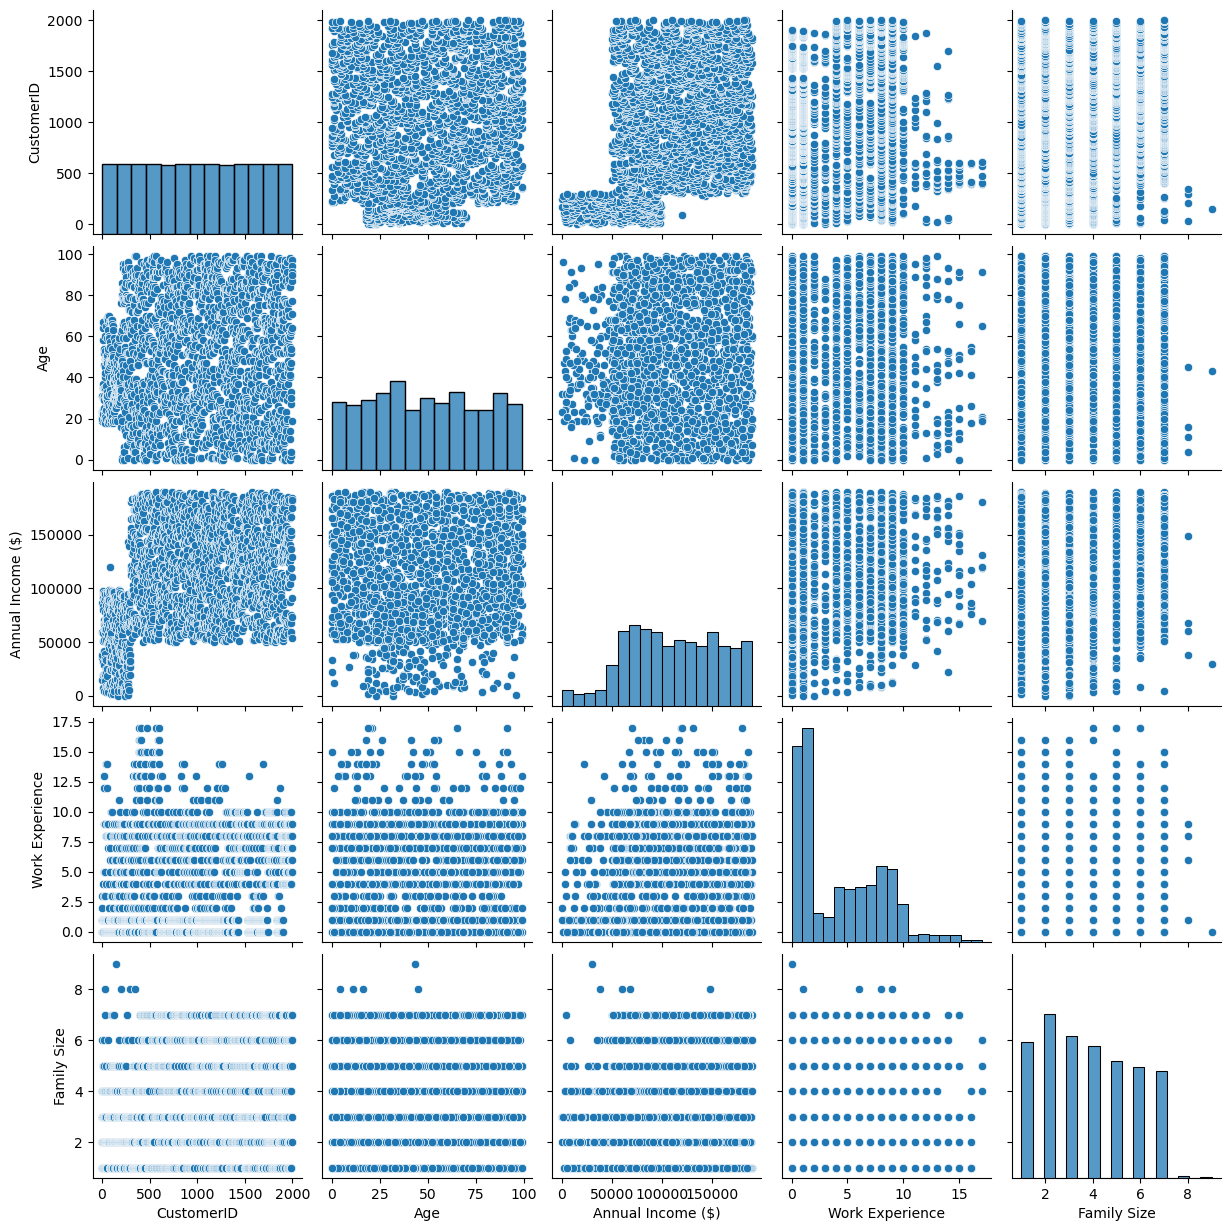

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(features)
plt.show()

In [13]:
pre_c_df = pre_c_df.drop(labels=['CustomerID'], axis=1)

In [14]:
from statsmodels.api import OLS

features, targets = pre_c_df.iloc[:,:-1], pre_c_df.iloc[:,-1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:         Spending Score   R-squared (uncentered):                   0.708
Model:                            OLS   Adj. R-squared (uncentered):              0.708
Method:                 Least Squares   F-statistic:                              1212.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        17:24:59   Log-Likelihood:                         -9730.3
No. Observations:                2000   AIC:                                  1.947e+04
Df Residuals:                    1996   BIC:                                  1.949e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [15]:
get_vif(features)

,vif_score,feature
0,3.172253,Age
1,4.533660,Annual Income ($)
2,1.993979,Work Experience
3,3.746431,Family Size


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income ($)'}>],
       [<Axes: title={'center': 'Work Experience'}>,
        <Axes: title={'center': 'Family Size'}>],
       [<Axes: title={'center': 'Spending Score'}>, <Axes: >]],
      dtype=object)

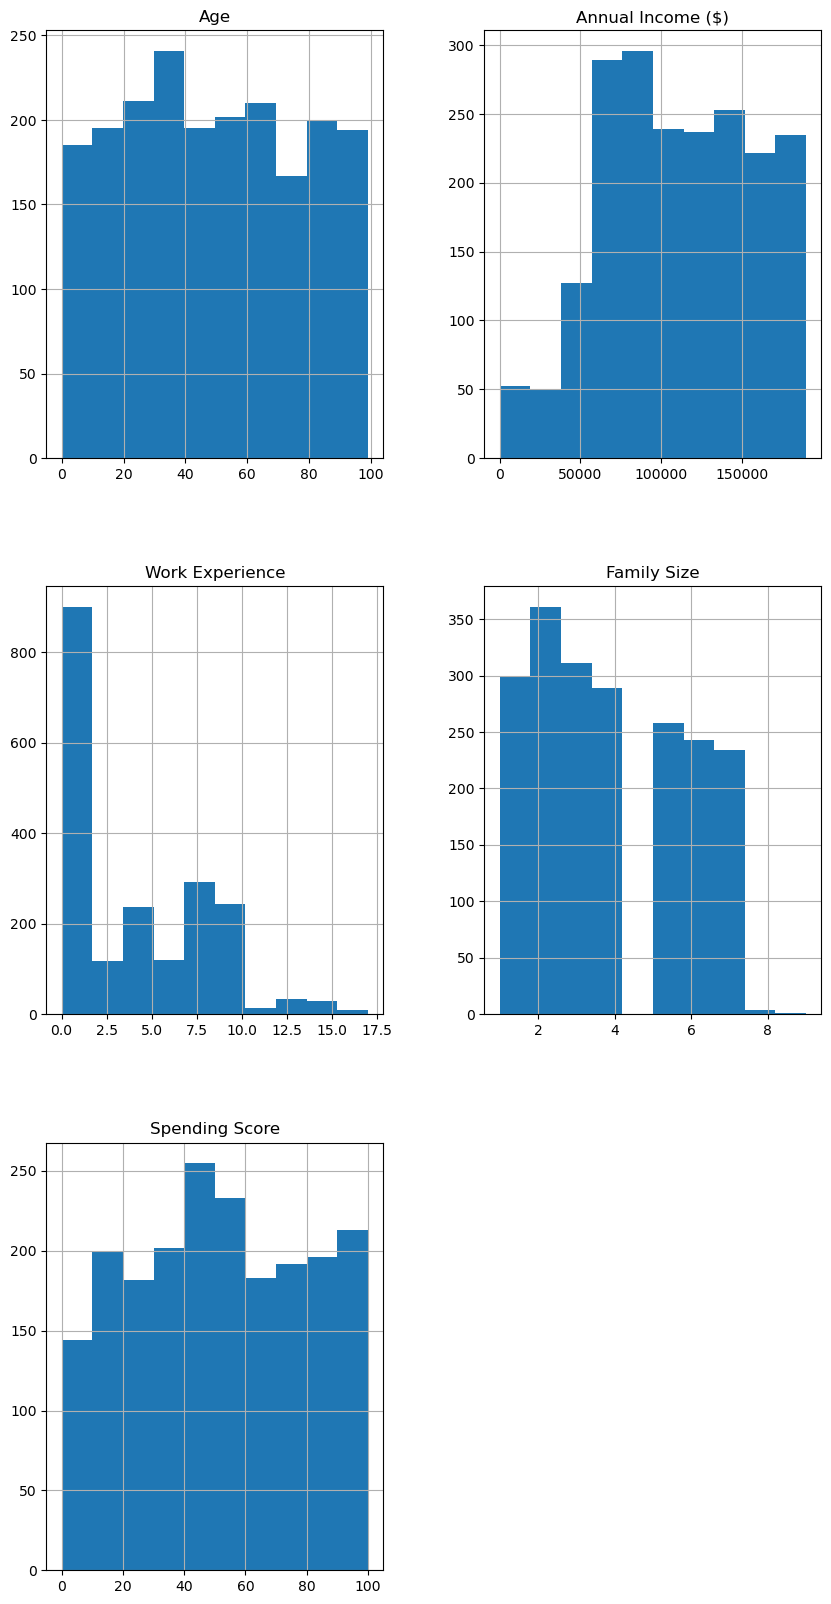

In [16]:
pre_c_df.hist(figsize=(10,20))

In [17]:
pre_c_df = pre_c_df[pre_c_df.Age > 0 ]

In [18]:
pre_c_df = pre_c_df[pre_c_df.Age < 90]

In [19]:
pre_c_df = pre_c_df[pre_c_df['Spending Score'] > 0] 

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income ($)'}>],
       [<Axes: title={'center': 'Work Experience'}>,
        <Axes: title={'center': 'Family Size'}>],
       [<Axes: title={'center': 'Spending Score'}>, <Axes: >]],
      dtype=object)

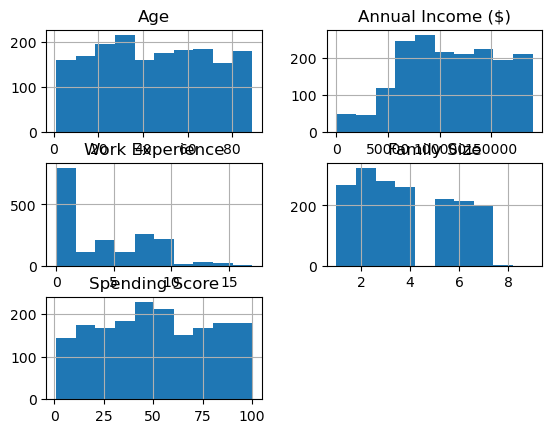

In [20]:
pre_c_df.hist()

In [21]:
from statsmodels.api import OLS

features, targets = pre_c_df.iloc[:,:-1], pre_c_df.iloc[:,-1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:         Spending Score   R-squared (uncentered):                   0.710
Model:                            OLS   Adj. R-squared (uncentered):              0.709
Method:                 Least Squares   F-statistic:                              1085.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        17:25:00   Log-Likelihood:                         -8660.3
No. Observations:                1780   AIC:                                  1.733e+04
Df Residuals:                    1776   BIC:                                  1.735e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

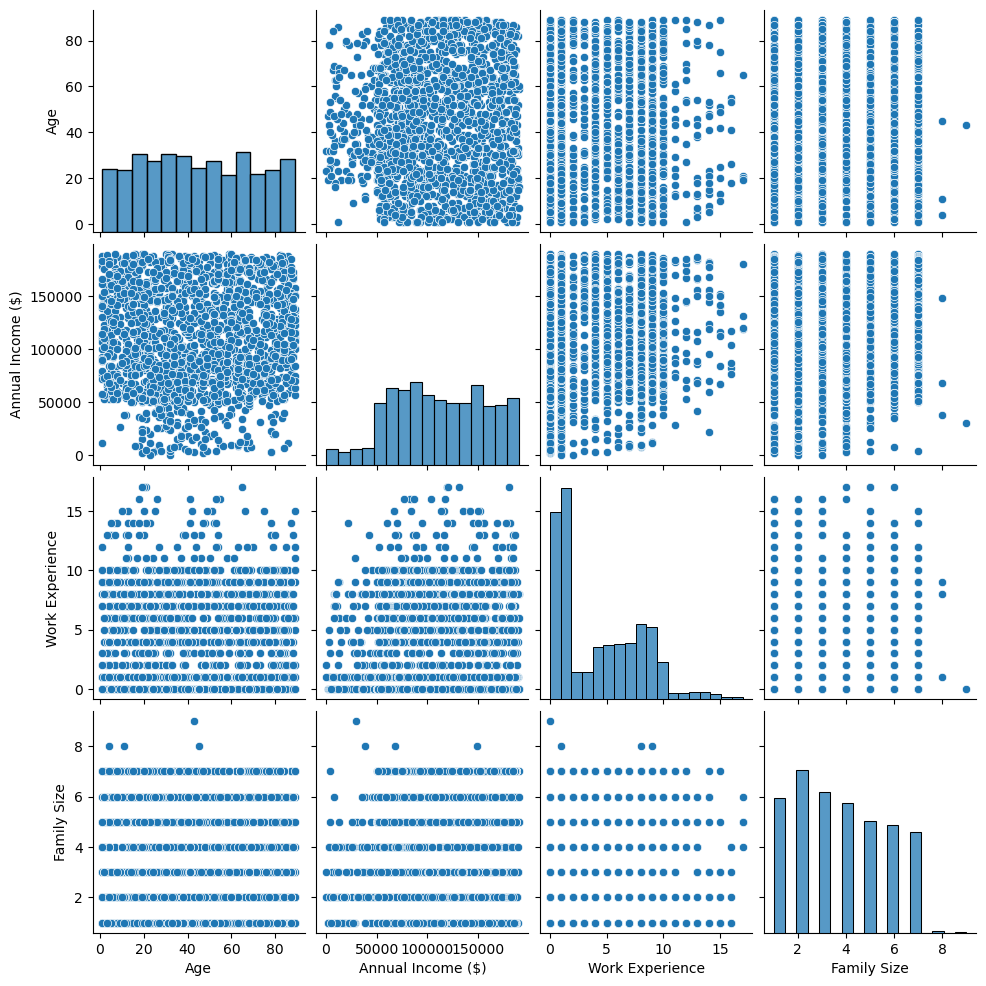

In [22]:
import seaborn as sns

sns.pairplot(features)
plt.show()

In [23]:
pre_c_df.reset_index()

,index,Age,Annual Income ($),Work Experience,Family Size,Spending Score
0,0,19,15000,1,4,39
1,1,21,35000,3,3,81
2,2,20,86000,1,1,6
3,3,23,59000,0,2,77
4,4,31,38000,2,6,40
...,...,...,...,...,...,...
1775,1993,64,175254,9,5,100
1776,1994,19,54121,6,3,89
1777,1995,71,184387,8,7,40
1778,1997,87,90961,9,2,14


In [45]:
columns = ['Age','Annual Income ($)','Work Experience','Family Size','Gender','Profession','Spending Score (1-100)']
en_c_df = c_df.iloc[pre_c_df.index].loc[:, columns].reset_index(drop=True)

In [128]:
en_c_df

,Age,Annual Income ($),Work Experience,Family Size,Gender,Profession,Spending Score (1-100)
0,19,15000,1,4,Male,Healthcare,39
1,21,35000,3,3,Male,Engineer,81
2,20,86000,1,1,Female,Engineer,6
3,23,59000,0,2,Female,Lawyer,77
4,31,38000,2,6,Female,Entertainment,40
...,...,...,...,...,...,...,...
1745,64,175254,9,5,Female,Artist,100
1746,19,54121,6,3,Female,Engineer,89
1747,71,184387,8,7,Female,Artist,40
1748,87,90961,9,2,Male,Healthcare,14


In [46]:
en_c_df.isna().sum()

Age                        0
Annual Income ($)          0
Work Experience            0
Family Size                0
Gender                     0
Profession                30
Spending Score (1-100)     0
dtype: int64

In [47]:
en_c_df = en_c_df.dropna().reset_index(drop=True)

In [49]:
new_c_df = en_c_df.copy()

In [50]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
result = label_encoder.fit_transform(new_c_df['Gender'])
new_c_df['Gender'] = result

In [51]:
new_c_df.Profession.value_counts()

Profession
Artist           545
Healthcare       315
Entertainment    203
Engineer         147
Doctor           145
Executive        138
Lawyer           127
Marketing         73
Homemaker         57
Name: count, dtype: int64

In [52]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
one_hot_encoder = OneHotEncoder(sparse_output=False)
result = one_hot_encoder.fit_transform(new_c_df[['Profession']])

new_c_df = pd.concat([new_c_df, 
                      pd.DataFrame(result, columns=one_hot_encoder.categories_).astype(np.int8)], 
                     axis=1)

In [53]:
new_c_df

,Age,Annual Income ($),Work Experience,Family Size,Gender,Profession,Spending Score (1-100),"(Artist,)","(Doctor,)","(Engineer,)","(Entertainment,)","(Executive,)","(Healthcare,)","(Homemaker,)","(Lawyer,)","(Marketing,)"
0,19,15000,1,4,1,Healthcare,39,0,0,0,0,0,1,0,0,0
1,21,35000,3,3,1,Engineer,81,0,0,1,0,0,0,0,0,0
2,20,86000,1,1,0,Engineer,6,0,0,1,0,0,0,0,0,0
3,23,59000,0,2,0,Lawyer,77,0,0,0,0,0,0,0,1,0
4,31,38000,2,6,0,Entertainment,40,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,64,175254,9,5,0,Artist,100,1,0,0,0,0,0,0,0,0
1746,19,54121,6,3,0,Engineer,89,0,0,1,0,0,0,0,0,0
1747,71,184387,8,7,0,Artist,40,1,0,0,0,0,0,0,0,0
1748,87,90961,9,2,1,Healthcare,14,0,0,0,0,0,1,0,0,0


In [54]:
new_c_df.columns=['Age','Annual Income','Work Experience','Family Size',	'Gender',\
                  'Profession', 'Spending Score', 'Artist', 'Doctor','Engineer','Entertainment',
                  'Executive','Healthcare','Homemaker','Lawyer','Marketing']

In [55]:
new_c_df = new_c_df.drop(labels =['Profession'],axis=1)

In [56]:
spending_score_column = new_c_df['Spending Score']

new_c_df.drop(columns=['Spending Score'], inplace=True)

new_c_df['Spending Score'] = spending_score_column

In [57]:
new_c_df

,Age,Annual Income,Work Experience,Family Size,Gender,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Spending Score
0,19,15000,1,4,1,0,0,0,0,0,1,0,0,0,39
1,21,35000,3,3,1,0,0,1,0,0,0,0,0,0,81
2,20,86000,1,1,0,0,0,1,0,0,0,0,0,0,6
3,23,59000,0,2,0,0,0,0,0,0,0,0,1,0,77
4,31,38000,2,6,0,0,0,0,1,0,0,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,64,175254,9,5,0,1,0,0,0,0,0,0,0,0,100
1746,19,54121,6,3,0,0,0,1,0,0,0,0,0,0,89
1747,71,184387,8,7,0,1,0,0,0,0,0,0,0,0,40
1748,87,90961,9,2,1,0,0,0,0,0,1,0,0,0,14


In [58]:
from statsmodels.api import OLS

features, targets = new_c_df.iloc[:,:-1], new_c_df.iloc[:,-1]

model = OLS(targets, features)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:         Spending Score   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9657
Date:                Sun, 28 Apr 2024   Prob (F-statistic):              0.483
Time:                        13:08:12   Log-Likelihood:                -8304.8
No. Observations:                1750   AIC:                         1.664e+04
Df Residuals:                    1736   BIC:                         1.671e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                -0.0358      0.027     

In [59]:
new_c_df.corr()

,Age,Annual Income,Work Experience,Family Size,Gender,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Spending Score
Age,1.000000,0.014270,-0.016637,0.028903,0.000375,-0.007492,-0.007490,0.045732,0.018975,-0.028892,-0.000303,-0.013872,-0.000584,-0.013557,-0.030692
Annual Income,0.014270,1.000000,0.079238,0.109816,-0.005133,-0.020161,-0.008224,-0.009790,0.018454,0.016982,0.023781,-0.006585,-0.005866,-0.013071,0.024575
Work Experience,-0.016637,0.079238,1.000000,0.011991,0.016368,0.013306,0.007638,-0.015155,-0.042149,-0.000476,0.004683,0.094013,-0.042093,0.009977,-0.022376
Family Size,0.028903,0.109816,0.011991,1.000000,0.003441,-0.046302,-0.011954,-0.028131,0.031103,0.035500,0.038737,0.028260,-0.023716,-0.003673,0.000159
Gender,0.000375,-0.005133,0.016368,0.003441,1.000000,-0.049381,0.024277,0.016511,0.018368,0.024227,0.009985,-0.021536,0.000499,-0.004801,0.012043
Artist,-0.007492,-0.020161,0.013306,-0.046302,-0.049381,1.000000,-0.202140,-0.203656,-0.243617,-0.196771,-0.315090,-0.123400,-0.188125,-0.140314,0.048605
Doctor,-0.007490,-0.008224,0.007638,-0.011954,0.024277,-0.202140,1.000000,-0.091020,-0.108880,-0.087943,-0.140824,-0.055151,-0.084079,-0.062711,0.005880
Engineer,0.045732,-0.009790,-0.015155,-0.028131,0.016511,-0.203656,-0.091020,1.000000,-0.109697,-0.088603,-0.141880,-0.055565,-0.084710,-0.063181,-0.012176
Entertainment,0.018975,0.018454,-0.042149,0.031103,0.018368,-0.243617,-0.108880,-0.109697,1.000000,-0.105989,-0.169720,-0.066468,-0.101332,-0.075578,0.023791
Executive,-0.028892,0.016982,-0.000476,0.035500,0.024227,-0.196771,-0.087943,-0.088603,-0.105989,1.000000,-0.137084,-0.053687,-0.081846,-0.061045,-0.017466


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income'}>,
        <Axes: title={'center': 'Work Experience'}>,
        <Axes: title={'center': 'Family Size'}>],
       [<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Artist'}>,
        <Axes: title={'center': 'Doctor'}>,
        <Axes: title={'center': 'Engineer'}>],
       [<Axes: title={'center': 'Entertainment'}>,
        <Axes: title={'center': 'Executive'}>,
        <Axes: title={'center': 'Healthcare'}>,
        <Axes: title={'center': 'Homemaker'}>],
       [<Axes: title={'center': 'Lawyer'}>,
        <Axes: title={'center': 'Marketing'}>,
        <Axes: title={'center': 'Spending Score'}>, <Axes: >]],
      dtype=object)

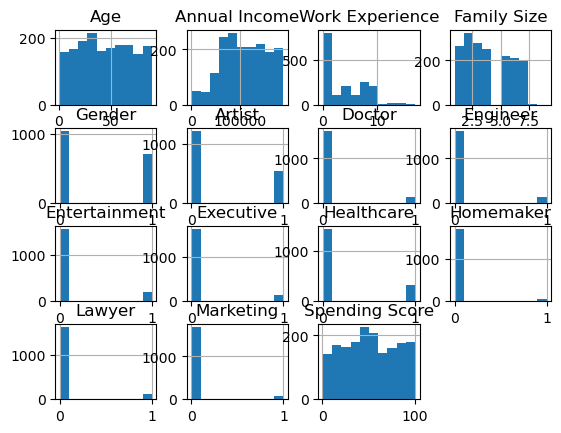

In [44]:
new_c_df.hist()

In [60]:
lb_c_df = en_c_df.copy()

In [64]:
from sklearn.preprocessing import LabelEncoder

columns = ['Gender', 'Profession']
label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(lb_c_df[column])
    label_encoders = encoder.classes_
    lb_c_df[column] = result

print(result)
print(encoder.classes_)

[5 2 2 ... 0 5 4]
['Artist' 'Doctor' 'Engineer' 'Entertainment' 'Executive' 'Healthcare'
 'Homemaker' 'Lawyer' 'Marketing']


In [65]:
lb_c_df

,Age,Annual Income ($),Work Experience,Family Size,Gender,Profession,Spending Score (1-100)
0,19,15000,1,4,1,5,39
1,21,35000,3,3,1,2,81
2,20,86000,1,1,0,2,6
3,23,59000,0,2,0,7,77
4,31,38000,2,6,0,3,40
...,...,...,...,...,...,...,...
1745,64,175254,9,5,0,0,100
1746,19,54121,6,3,0,2,89
1747,71,184387,8,7,0,0,40
1748,87,90961,9,2,1,5,14


In [66]:
from statsmodels.api import OLS

features, targets = lb_c_df.iloc[:,:-1], lb_c_df.iloc[:,-1]

model = OLS(targets, features)
print(model.fit().summary())

                                   OLS Regression Results                                  
Dep. Variable:     Spending Score (1-100)   R-squared (uncentered):                   0.716
Model:                                OLS   Adj. R-squared (uncentered):              0.715
Method:                     Least Squares   F-statistic:                              732.6
Date:                    Sun, 28 Apr 2024   Prob (F-statistic):                        0.00
Time:                            13:11:37   Log-Likelihood:                         -8498.1
No. Observations:                    1750   AIC:                                  1.701e+04
Df Residuals:                        1744   BIC:                                  1.704e+04
Df Model:                               6                                                  
Covariance Type:                nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0

In [67]:
get_vif(features)

,vif_score,feature
0,3.324712,Age
1,4.817766,Annual Income ($)
2,2.004211,Work Experience
3,3.928368,Family Size
4,1.618728,Gender
5,2.097094,Profession


In [68]:
from torch.nn import Linear, Module

class LinearRegressionModel(Module):
    def __init__(self, input):
        super().__init__()
        self.linear = Linear(input, 1)

    def forward(self, x):
        return self.linear(x)

In [79]:
import numpy as np
import torch
from torch.optim import SGD
from torch.nn.functional import mse_loss
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = lb_c_df.iloc[:, :-1], lb_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

l_r = LinearRegressionModel(6)

optimizer = SGD(l_r.parameters(), lr=1e-11)

epochs = 15000

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(y_train, H)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        for i, w in enumerate(list(l_r.parameters())[0][0]):
            print('W{}: {:.4f}, '\
                  .format(i + 1, w.item()), end='')
        print('b: {:.4f}, loss: {:.4f}'.format(list(l_r.parameters())[1].item(), loss.item()))

W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.0100, W6: -0.3078, b: -0.1553, loss: 1431.1957
W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.0100, W6: -0.3078, b: -0.1553, loss: 1431.1957
W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.0100, W6: -0.3078, b: -0.1553, loss: 1431.1957
W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.0100, W6: -0.3078, b: -0.1553, loss: 1431.1957
W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.0100, W6: -0.3078, b: -0.1553, loss: 1431.1957
W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.0100, W6: -0.3078, b: -0.1553, loss: 1431.1957
W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.0100, W6: -0.3078, b: -0.1553, loss: 1431.1957
W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.0100, W6: -0.3078, b: -0.1553, loss: 1431.1957
W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.0100, W6: -0.3078, b: -0.1553, loss: 1431.1957
W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.0100, W6: -0.3078

In [73]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [76]:
import numpy as np

H = l_r(X_test)
loss = mse_loss(y_test, H)

print(loss.item())
print(np.sqrt(loss.item()))

1249.072265625
35.342216478667545


In [111]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = lb_c_df.iloc[:, :-1], lb_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
print('W: {:.4f}, b: {:.4f}'.format(l_r.coef_[0], l_r.intercept_))

W: -0.0285, b: 52.8234


In [112]:
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 755.3939, RMSE: 27.4844, MSLE: 0.7121, RMSLE: 0.8439, R2: -0.0034


In [124]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from torch.utils.data import TensorDataset, DataLoader

torch.manual_seed(124)

features, targets = lb_c_df.iloc[:, :-1], lb_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.4, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

td = TensorDataset(X_train, y_train)
dl = DataLoader(td, batch_size=1000, shuffle=True)

l_r = Linear(6, 1)

optimizer = SGD(l_r.parameters(), lr=1e-12)

epochs = 10000

for epoch in range(1, epochs + 1):
    for i, samples in enumerate(dl):
        
        X_train, y_train = samples

        H = l_r(X_train)
        loss = mse_loss(H, y_train)
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 1000 == 0:
            print(f'Epoch: {epoch}/{epochs}, Batch: {i + 1}/{len(dl)}, ', end='')
            for i, w in enumerate(list(l_r.parameters())[0][0]):
                print(f'W{i + 1}: {np.round(w.item(), 4)}, ', end='')
            print(f'b: {np.round(list(l_r.parameters())[1].item(), 4)}')
            print(f'loss: {np.round(loss.item(), 4)}')

Epoch: 1000/10000, Batch: 1/2, W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.01, W6: -0.3077, b: -0.1553
loss: 1420.9263
Epoch: 1000/10000, Batch: 2/2, W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.01, W6: -0.3077, b: -0.1553
loss: 1732.179
Epoch: 2000/10000, Batch: 1/2, W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.01, W6: -0.3077, b: -0.1553
loss: 1425.1001
Epoch: 2000/10000, Batch: 2/2, W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.01, W6: -0.3077, b: -0.1553
loss: 1649.2076
Epoch: 3000/10000, Batch: 1/2, W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.01, W6: -0.3077, b: -0.1553
loss: 1429.2537
Epoch: 3000/10000, Batch: 2/2, W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.01, W6: -0.3077, b: -0.1553
loss: 1580.1793
Epoch: 4000/10000, Batch: 1/2, W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.01, W6: -0.3077, b: -0.1553
loss: 1430.9823
Epoch: 4000/10000, Batch: 2/2, W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5:

In [125]:
y_test = y_test.detach().numpy()

H = l_r(X_test)
prediction = H.detach().numpy()

In [126]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    # MSLE = mean_squared_log_error(y_test, prediction)
    # RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [127]:
get_evaluation(y_test, prediction)

MSE: 1332.8741, RMSE: 36.5085, R2: -0.7742


In [131]:
from sklearn.preprocessing import PowerTransformer

# box-cox : 양수만 가능 (0과 음수 불가능)
# yeo-johnson : 음수, 0, 양수 다 가능 (default)

# standardize = 표준화 - 자체 파이프라인을 가지고 있어서 표준화까지 진행하면 값이 많이 변할 가능성
# 여기선 사용
ptf = PowerTransformer(standardize=True)
result = ptf.fit_transform(pre_c_df[['Spending Score (1-100)']])
pre_c_df['Target_yeo'] = result
pre_c_df

KeyError: "None of [Index(['Spending Score (1-100)'], dtype='object')] are in the [columns]"